<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


<h2>PROJECT</h2>
<hr>
<h2>Task 1: Become familiar with the dataset</h2>

In [6]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [7]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


<h2>Task 2: Generate Descriptive Statistics and Visualizations</h2>
<h3>Task 2.1: For the "Median value of owner-occupied homes" provide a boxplot.</h3>

The median value of owner-occupied homes is $ 21.2 thousand dollars; ranging from $ 5.0 to $ 50.0 thousand dollars.



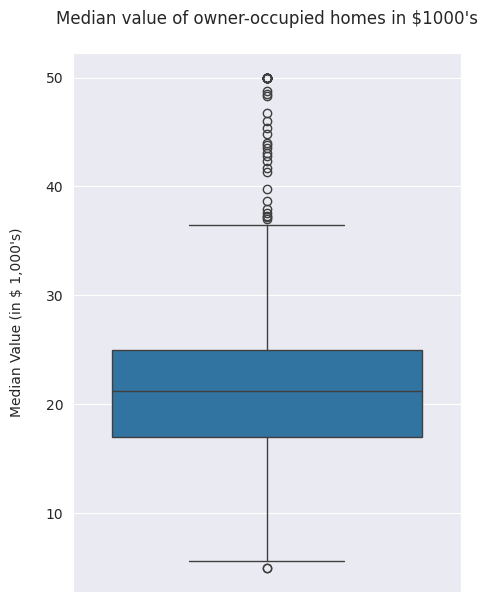

In [8]:
fg = pyplot.figure(figsize=(5,7))
fg
sns.set_style('darkgrid')
ax = sns.boxplot(data=boston_df, y='MEDV')
pyplot.title("Median value of owner-occupied homes in $1000's\n")
pyplot.ylabel("Median Value (in $ 1,000's)\n")
ax
#Some additional information:
MEDV_median = boston_df['MEDV'].median()
MEDV_min = boston_df['MEDV'].min()
MEDV_max = boston_df['MEDV'].max()
print(f"The median value of owner-occupied homes is $ {MEDV_median} thousand dollars; ranging from $ {MEDV_min} to $ {MEDV_max} thousand dollars.\n")

<h3>Task 2.2: Provide a bar plot for the Charles river variable.</h3>

35 tracts bound the Charles River and 471 don't.



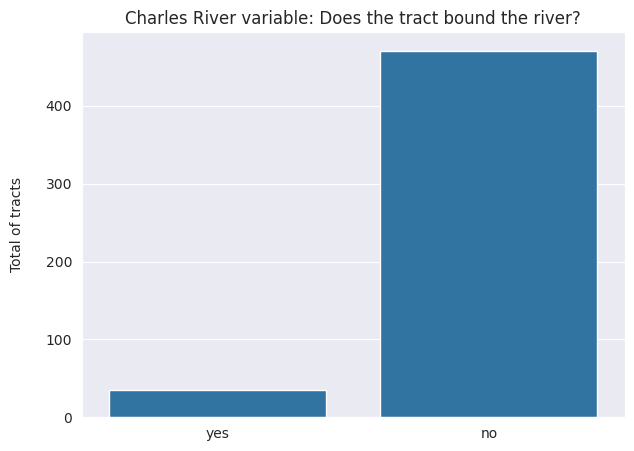

In [9]:
a = boston_df[boston_df.CHAS == 1].count()['CHAS']
b = boston_df[boston_df.CHAS == 0].count()['CHAS']
chas = {'yes': a, 'no':b}
fg1 = pyplot.figure(figsize=(7,5))
fg1
ax1 = sns.barplot(data=chas)
pyplot.title("Charles River variable: Does the tract bound the river?")
pyplot.ylabel("Total of tracts\n")
ax1
#Some additional information:
print(f"{a} tracts bound the Charles River and {b} don't.\n")

<h3>Task 2.3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)</h3>

Text(0, 0.5, 'AGE\n')

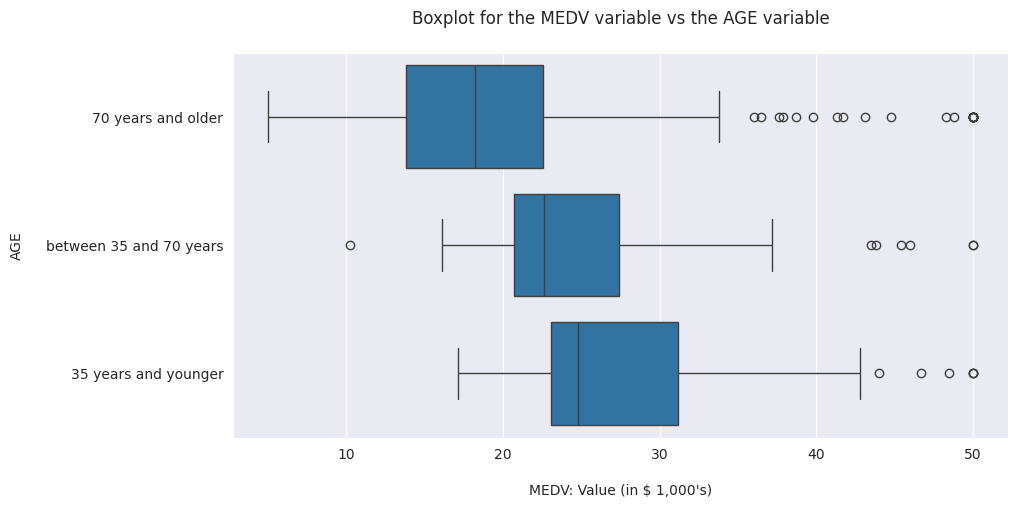

In [10]:
boston_df.loc[(boston_df.AGE <= 35), 'Age_group'] = '35 years and younger'
boston_df.loc[(boston_df.AGE > 35)&(boston_df.AGE < 70), 'Age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df.AGE > 70), 'Age_group'] = '70 years and older'
fg2 = pyplot.figure(figsize=(10,5))
ax2 = sns.boxplot(y='Age_group', x='MEDV', data=boston_df, order = ['70 years and older', 'between 35 and 70 years', '35 years and younger'])
pyplot.title("Boxplot for the MEDV variable vs the AGE variable\n")
pyplot.xlabel("\nMEDV: Value (in $ 1,000's)")
pyplot.ylabel("AGE\n")

<h3>Task 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?</h3>

The graphic shows that greater proportions of non-retail business acres per town lead to greater Nitric oxide concentrations.



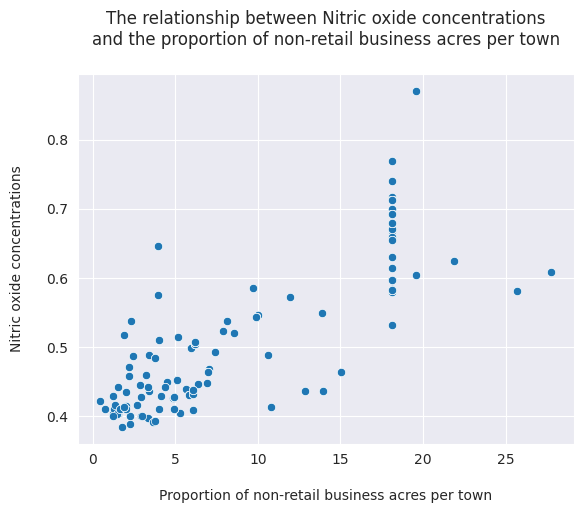

In [30]:
df = boston_df[['NOX','INDUS']]
ax3 = sns.scatterplot(y='NOX', x='INDUS', data=df)
#ax3 = sns.lmplot(y='NOX', x='INDUS', data=df)
pyplot.title("The relationship between Nitric oxide concentrations\nand the proportion of non-retail business acres per town\n")
pyplot.xlabel("\nProportion of non-retail business acres per town")
pyplot.ylabel("Nitric oxide concentrations\n")
#Some additional information:
print(f"The graphic shows that greater proportions of non-retail business acres per town lead to greater Nitric oxide concentrations.\n")

<h3>Task 2.5: Create a histogram for the pupil to teacher ratio variable.</h3>

In [97]:
#boston_df[['PTRATIO']].describe()

The average ratio pupils/teacher is 18.5 (with median equal to 19.0), ranging from 12.6 to 22.0.



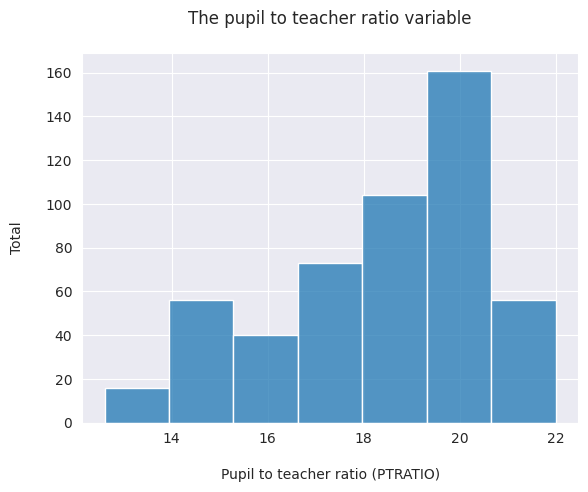

In [56]:
df1 = boston_df[['PTRATIO']]
ax4 = sns.histplot(x='PTRATIO', data=df1, bins=7)
pyplot.title("The pupil to teacher ratio variable\n")
pyplot.xlabel("\nPupil to teacher ratio (PTRATIO)")
pyplot.ylabel("Total\n")
#Some additional information:
PTRATIO_mean = round(df1['PTRATIO'].mean(), 1)
PTRATIO_median = round(df1['PTRATIO'].median(), 1)
PTRATIO_min = round(df1['PTRATIO'].min(), 1)
PTRATIO_max = round(df1['PTRATIO'].max(), 1)
print(f"The average ratio pupils/teacher is {PTRATIO_mean} (with median equal to {PTRATIO_median}), ranging from {PTRATIO_min} to {PTRATIO_max}.\n")

<h2>Task 3: Use the appropriate tests to answer the questions provided</h2>
<h3>Task 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)</h3>

<p>H0: MEDV = CHAS</p>
<p>H1: MEDV != CHAS</p>

In [42]:
#boston_df.head()
#df3 = boston_df.groupby('CHAS').agg({'MEDV':['mean', 'std', 'var', 'median']}).reset_index()
scipy.stats.levene(boston_df[boston_df['CHAS']==0.0]['MEDV'], boston_df[boston_df['CHAS']==1.0]['MEDV'], center ='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [49]:
# p-value < 0.05 :  scipy.stats.ttest_ind(..., equal_var = False)
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0.0]['MEDV'], boston_df[boston_df['CHAS']==1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

<h4>Conclusion:</h4><p>Since p-value < 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river or not.</p>

<h3>Task 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)</h3>

<p>H0: MEDV ('Age_group' == '35 years and younger') = MEDV ('Age_group' == 'between 35 and 70 years') = MEDV ('Age_group' == '70 years and older')</p>
<p>H1: MEDV (i) != MEDV (j), where i,j ϵ {'Age_group' == '35 years and younger', 'Age_group' == 'between 35 and 70 years',  'Age_group' == '70 years and older'}</p>

In [48]:
#boston_df.head()
scipy.stats.levene(boston_df[boston_df['Age_group']=='35 years and younger']['MEDV'], boston_df[boston_df['Age_group']=='between 35 and 70 years']['MEDV'], boston_df[boston_df['Age_group']=='70 years and older']['MEDV'], center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [51]:
x1 = boston_df[boston_df['Age_group']=='35 years and younger']['MEDV']
x2 = boston_df[boston_df['Age_group']=='between 35 and 70 years']['MEDV']
x3 = boston_df[boston_df['Age_group']=='70 years and older']['MEDV']
f_statistic, p_value = scipy.stats.f_oneway(x1, x2, x3)
print(f"F_statistic: {f_statistic}, P-Value: {p_value}")

F_statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


<h4>Conclusion:</h4><p>Since p-value < 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses for each proportion of owner occupied units built prior to 1940.</p>

<h3>Task 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)</h3>

<p>H0: there is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town</p>
<p>H1: there is significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town</p>

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

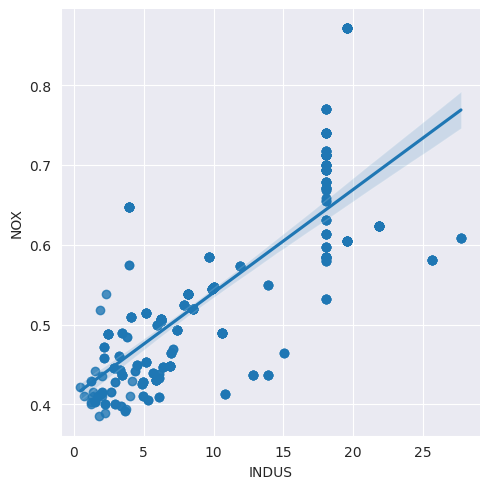

In [57]:
ax4 = sns.lmplot(y='NOX', x='INDUS', data=df)

In [59]:
scipy.stats.pearsonr(boston_df['NOX'],boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

<h4>Conclusion:</h4><p>Since p-value < 0.05, we reject the null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.</p>

<h3>Task 3.4: What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)</h3>

In [61]:
# k is the independent variable
k = boston_df['DIS']
# w is the dependent variable
w = boston_df['MEDV']
# to add an intercept (B0) to the model
k = sm.add_constant(k)
model = sm.OLS(w, k).fit()
predictions = model.predict(k)
# Results:
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 22 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        23:06:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<h4>Conclusion:</h4><p>Since DIS(coef) = 1.0916, we conclude that the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes is approximately 1.1.</p>